<a href="https://colab.research.google.com/github/MeizhuWang001/github_portfolio/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction  
Customer churn refers to when clients discontinue using a company’s products or services. It's a vital metric, as retaining current customers typically costs less than acquiring new ones. By analyzing customer data, we can better understand behavior patterns and create targeted strategies to reduce churn.

#### **Objectives:**
* Pinpoint key drivers of customer churn  
* Develop a machine learning model to forecast churn  
* Deliver insights and practical recommendations  

#### **Methodology:**
* Data cleaning and preparation  
* Exploratory data analysis (EDA)  
* Logistic regression modeling with feature selection, parameter tuning, and interpretation  
* Strategy development and recommendations  

#### **Key Insights:**

##### **I. From EDA:**
* Overall churn rate stands at 26.6%  
* Gender has no significant impact on churn  
* Seniors are more likely to churn  
* Customers without a spouse or children show higher churn rates  
* Recently joined customers have higher churn risk  
* Those with higher monthly bills are more prone to churn  
* Customers on monthly contracts are far more likely to leave  
* E-check users and those on paperless billing are more likely to churn  
* Phone service users, especially with multiple lines, show increased churn  
* Fiber optic internet users have a higher churn probability  
* Lack of online security, backup, device protection, or tech support correlates with higher churn  
* Customers with no internet service across all offerings have the lowest churn  

##### **II. From Modeling:**
* A logistic regression model using demographics, account, and service data achieved an 80% recall rate  
* Month-to-month contracts, fiber optic service, e-check payments, and paperless billing are all linked to higher churn  
* Seniors and those without children are more likely to churn  
* Two-year and one-year contracts, phone service, online security, and tech support are associated with reduced churn  
* More bundled services tend to reduce churn risk  

#### **Next Steps:**
* Share key churn factors with marketing and sales teams to guide retention efforts—e.g., offer discounts on longer contracts, de-prioritize e-check as a payment option, and improve onboarding for new clients  
* Investigate top churn drivers like month-to-month contracts, fiber optics, and e-check usage further  
* Evaluate multicollinearity among features that might hinder model performance  
* Incorporate more data and relevant variables to enhance model accuracy and prediction power  

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [8]:
df = pd.read_csv('/content/Customer-Churn (2).csv')

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.apply(lambda x: x == ' ', axis = 1).mean()

,0
customerID,0.000000
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,0.000000
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.000000
OnlineSecurity,0.000000


- Column TotalCharges contains empty string, therefore, we are going to replace the empty string with "0"
- Convert TotalCharges to numerical data type

In [13]:
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [14]:
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


* Those missing values are actually blank space in csv file and have to do with customers who just started the service for less than one month (tenure=0) and haven't paid anyting yet. Since there are only 11 missing values, and it doesn't affect our analysis, we'll delete those entries for simplicity.

In [17]:
df.loc[df.TotalCharges == ' ', 'TotalCharges'] = 0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 2. EDA

Let’s begin by exploring and visualizing individual features to uncover patterns and identify areas worth further investigation. The dataset includes 21 columns, which can be categorized as follows:

### **Target Variable**
- **Churn**: Indicates whether a customer has discontinued service within the last month.

### **Customer Demographics**
- **Gender**, **SeniorCitizen** (age group), **Partner**, and **Dependents** — these describe basic demographic attributes of the customer.

### **Subscribed Services**
- Includes whether the customer has signed up for:  
  **Phone service**, **Multiple lines**, **Internet service**, **Online security**, **Online backup**, **Device protection**, **Tech support**, **Streaming TV**, and **Streaming movies**.

### **Account Information**
- Details such as:  
  **Tenure** (duration of being a customer), **Contract type**, **Payment method**, **Paperless billing**, **Monthly charges**, and **Total charges**.

#### 2.2 Churn vs. Tenure

Text(0.5, 1.0, 'Churn vs. Tenure')

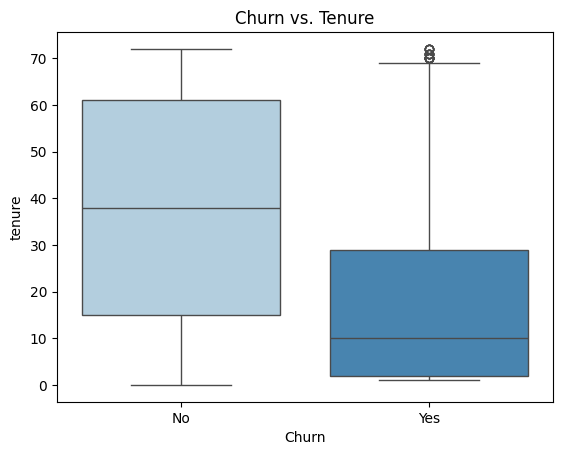

In [20]:
sns.boxplot(y='tenure', data=df, x='Churn', palette='Blues').set_title('Churn vs. Tenure')

- New clients are more likely to churn

#### 2.3 Churn vs. Monthly Charges

Text(0.5, 1.0, 'Churn vs. Monthly Charges')

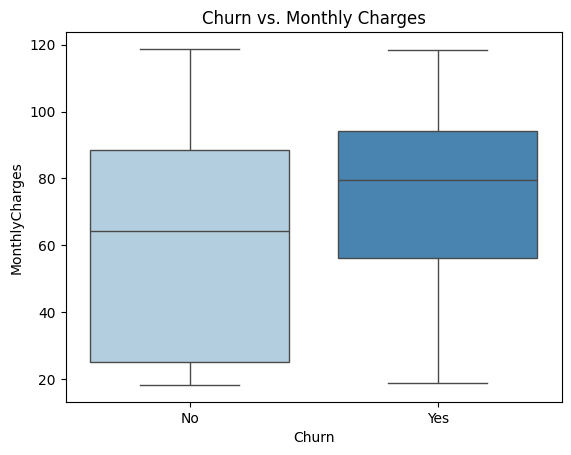

In [21]:
sns.boxplot(y='MonthlyCharges', data=df, x='Churn', palette='Blues').set_title('Churn vs. Monthly Charges')

- Clients with higher monthly charges are more likely to churn

#### 2.4 Churn vs. Gender

In [22]:
df['Churn_dummy'] = df.Churn.replace('No', 0).replace('Yes', 1)

Text(0.5, 1.0, 'Churn vs. Gender')

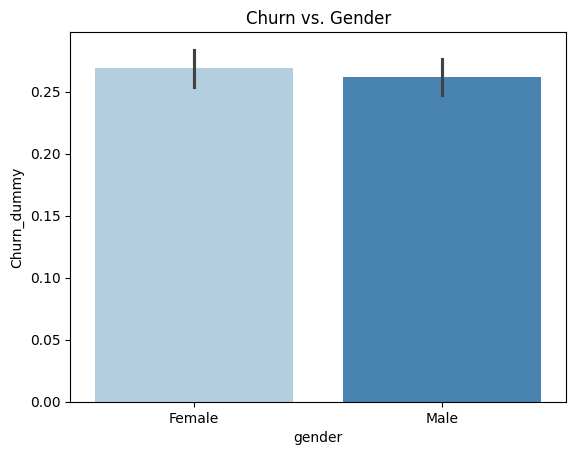

In [23]:
sns.barplot(y='Churn_dummy', data=df, x='gender',palette='Blues').set_title('Churn vs. Gender')

- Gender is not a determinant of churn

#### 2.4 Churn vs. Seniority

Text(0.5, 1.0, 'Churn vs. Seniority')

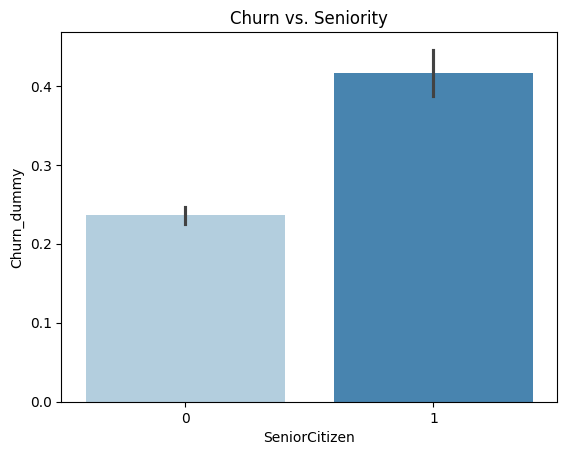

In [24]:
sns.barplot(y='Churn_dummy', data=df, x='SeniorCitizen',palette='Blues').set_title('Churn vs. Seniority')

- Senior citizens are more likely to churn

#### 2.5 Churn vs. Partner and Churn vs. Dependents

<Axes: title={'center': 'Churn vs. Dependents'}, xlabel='Dependents', ylabel='Churn_dummy'>

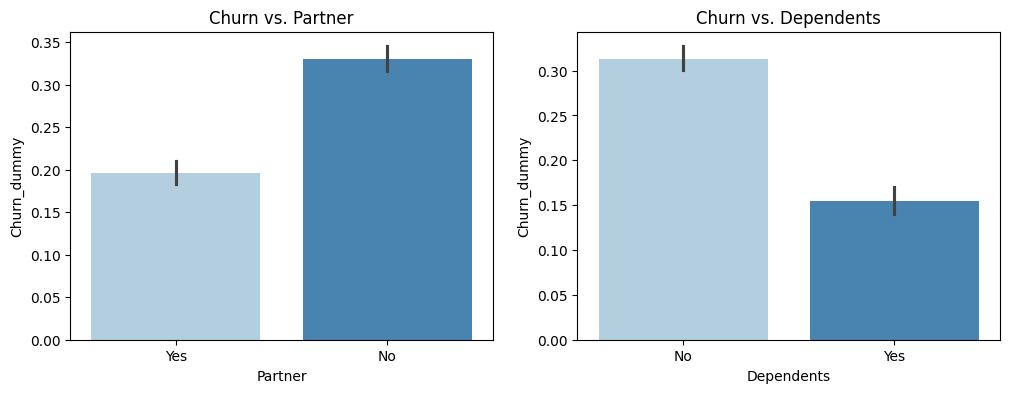

In [25]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title('Churn vs. Partner')
axis[1].set_title('Churn vs. Dependents')
sns.barplot(y='Churn_dummy', data=df, x='Partner',palette='Blues', ax=axis[0])
sns.barplot(y='Churn_dummy', data=df, x='Dependents',palette='Blues', ax=axis[1])

- Clients who do not have partner or dependent are more likely to churn

#### 2.6 Churn vs. PhoneService and Churn vs. MultipleLines

<Axes: title={'center': 'Churn vs. MultipleLines'}, xlabel='MultipleLines', ylabel='Churn_dummy'>

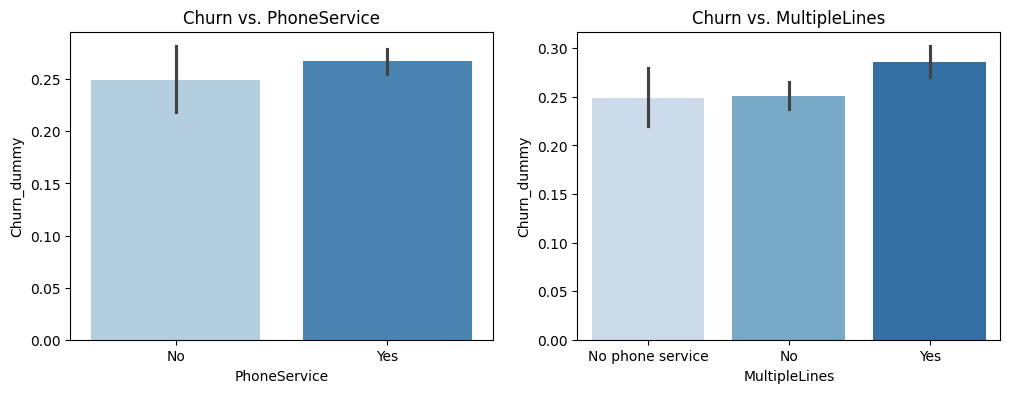

In [26]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title('Churn vs. PhoneService')
axis[1].set_title('Churn vs. MultipleLines')
sns.barplot(y='Churn_dummy', data=df, x='PhoneService',palette='Blues', ax=axis[0])
sns.barplot(y='Churn_dummy', data=df, x='MultipleLines',palette='Blues', ax=axis[1])

- Clients who have phone service and have multiple lines are more likely to churn

#### 2.6 Churn vs. InternetService

Text(0.5, 1.0, 'Churn vs. InternetService')

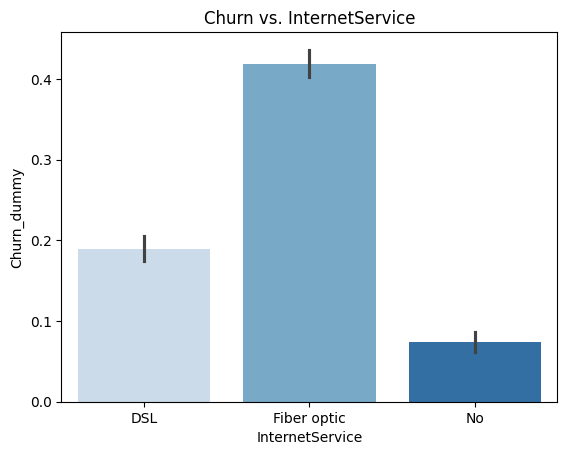

In [27]:
sns.barplot(y='Churn_dummy', data=df, x='InternetService',palette='Blues').set_title('Churn vs. InternetService')

- Clients with fiber optic internet service are more likely to churn
- Clients with no internet service have relatively lower churn rate

#### 2.7 Churn vs. Other Services

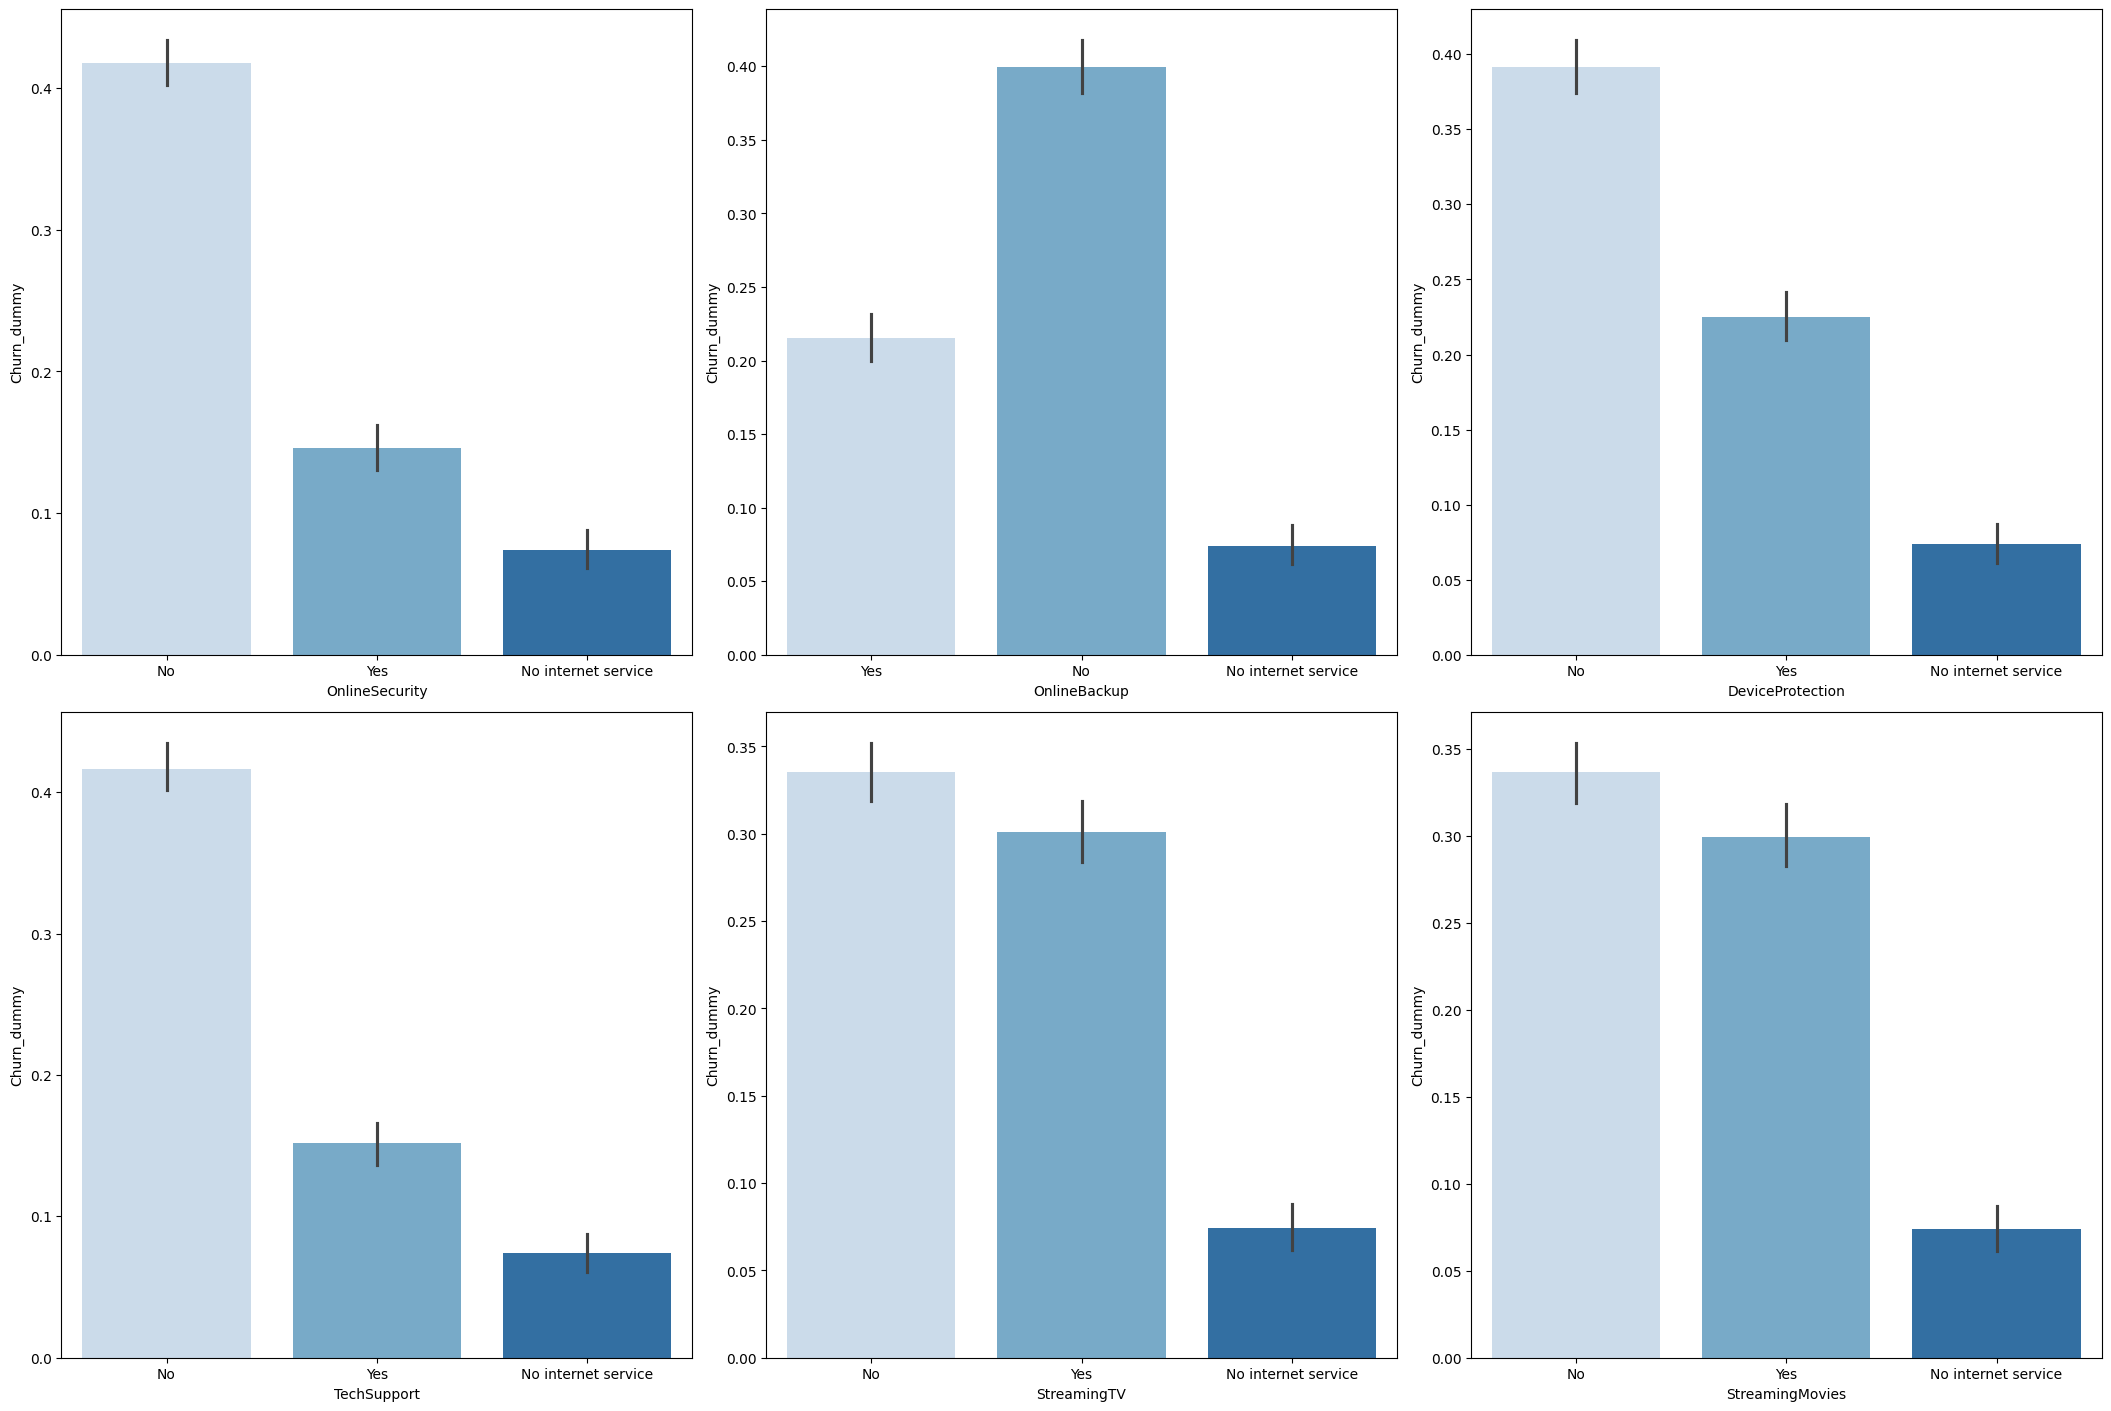

In [28]:
other_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
num_plots = len(other_services)
total_cols = 3
total_rows = num_plots//total_cols
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), constrained_layout=True)
for i, var in enumerate(other_services):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.barplot(y='Churn_dummy',x=var, data=df, ax=axs[row][pos], palette='Blues')

- Clients who doesn't have other services (Online Security, Online Backup, Device Protection, TechSupport, StreamingTV, StreamingMovies) are more likely to churn

#### 2.8 Churn vs. Contract

Text(0.5, 1.0, 'Churn vs. Contract')

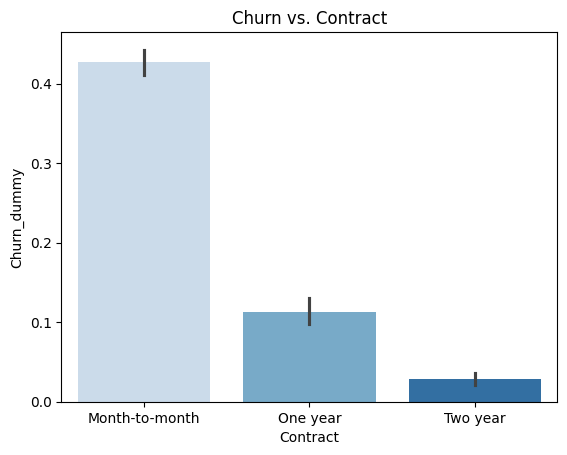

In [29]:
sns.barplot(y='Churn_dummy', data=df, x='Contract',palette='Blues').set_title('Churn vs. Contract')

- Clients with short term contract type are more likely to churn

#### 2.9 Churn vs. PaperlessBilling and Churn vs. PaymentMethod

<Axes: title={'center': 'Churn vs. PaymentMethod'}, xlabel='PaymentMethod', ylabel='Churn_dummy'>

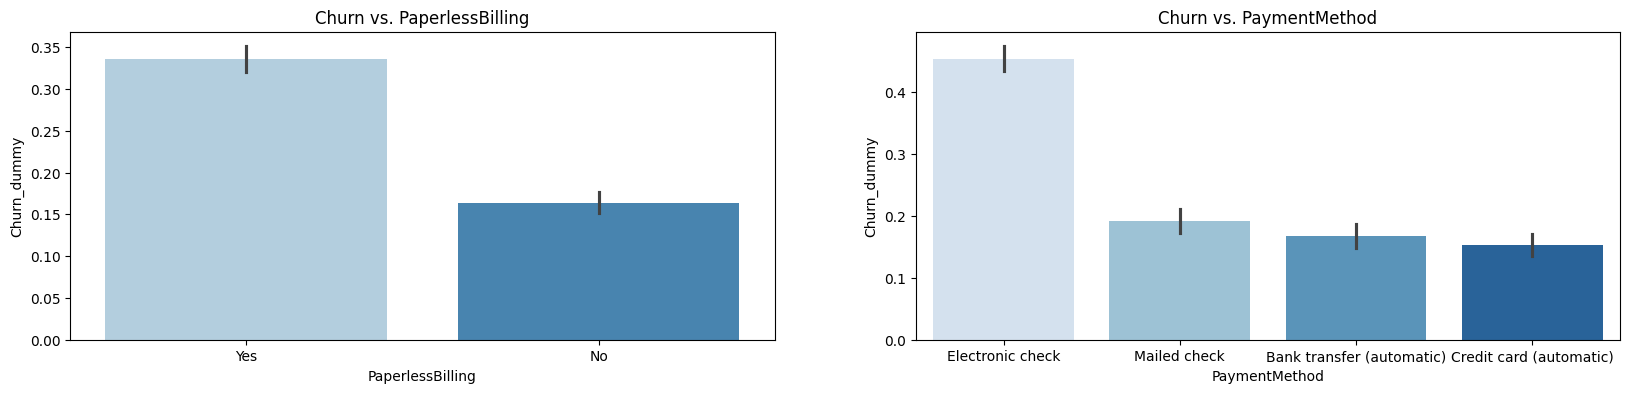

In [30]:
fig, axis = plt.subplots(1, 2, figsize=(20,4))
axis[0].set_title('Churn vs. PaperlessBilling')
axis[1].set_title('Churn vs. PaymentMethod')
sns.barplot(y='Churn_dummy', data=df, x='PaperlessBilling', palette='Blues', ax=axis[0])
sns.barplot(y='Churn_dummy', data=df, x='PaymentMethod', palette='Blues', ax=axis[1])

- Clients with paperless billing are more likely to churn
- Clients who have payment method with Electornic Check are more likely to churn

#### 3.1 Data Preparation

In [31]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_dummy
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [32]:
data_raw = df.drop(columns = ['customerID', 'gender', 'Churn'], axis=1, inplace=False)

X = pd.get_dummies(data_raw.drop('Churn_dummy', axis=1, inplace=False), drop_first=True)
y = data_raw['Churn_dummy']

In [33]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,True,True,True,False,True,False,...,False,True,False,True,True,False,True,False,False,True
7039,0,72,103.20,7362.90,True,True,True,False,True,True,...,False,True,False,True,True,False,True,True,False,False
7040,0,11,29.60,346.45,True,True,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
7041,1,4,74.40,306.60,True,False,True,False,True,True,...,False,False,False,False,False,False,True,False,False,True


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666, stratify=y, train_size=0.8)

3.2 Logistic Regression

##### 3.2.1 Feature Selections

In [35]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(class_weight='balanced')

##### 3.2.2 GridSearch & Parameter Tuning

In [36]:
C = np.arange(0.1, 0.3, 0.01)
penalty = ['l1','l2']

param_grid = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(lgr, param_grid, scoring='recall', cv=5)
grid_result = grid_search.fit(X_train, y_train)

result_lgr = pd.DataFrame(grid_result.cv_results_)
result_lgr.sort_values(by='mean_test_score', ascending=False)[:4]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
21,0.067378,0.002116,0.005638,0.000653,0.20,l2,"{'C': 0.19999999999999996, 'penalty': 'l2'}",0.795987,0.752508,0.762542,0.859532,0.816054,0.797324,0.038576,1
31,0.071252,0.004887,0.005319,0.000353,0.25,l2,"{'C': 0.24999999999999992, 'penalty': 'l2'}",0.799331,0.759197,0.762542,0.859532,0.795987,0.795318,0.036108,2
3,0.150130,0.094491,0.012099,0.006040,0.11,l2,"{'C': 0.11, 'penalty': 'l2'}",0.795987,0.769231,0.749164,0.852843,0.802676,0.793980,0.035115,3
39,0.068095,0.003083,0.005149,0.000216,0.29,l2,"{'C': 0.2899999999999999, 'penalty': 'l2'}",0.802676,0.769231,0.762542,0.822742,0.799331,0.791304,0.022346,4


In [37]:
best_lgr = grid_search.best_estimator_
y_pred = best_lgr.predict(X_test)
print(recall_score(y_test, y_pred))

0.7780748663101604


- We are more interested in the clients who are churn, so recall score is an appropriate metric in cross validation and measuring generalization ability
- The bset model has a recall score of 0.78 on testing dataset

##### 3.2.3 Model Result Interpretation

In [38]:
Coeffient = best_lgr.coef_.flatten()
pd.DataFrame({'Coeffient':Coeffient}, index=X.columns).sort_values(by='Coeffient', ascending=False)

,Coeffient
PaymentMethod_Electronic check,0.438431
PaperlessBilling_Yes,0.384242
SeniorCitizen,0.376816
MultipleLines_No phone service,0.344689
InternetService_Fiber optic,0.318632
MultipleLines_Yes,0.179272
StreamingTV_Yes,0.085763
StreamingMovies_Yes,0.073958
Partner_Yes,0.046661
MonthlyCharges,0.016960


*    Customers with month-to-month contract, fiber optic internet, E-check payment and paperless billing have higher probability to churn.
*    Senior clients are more likely to churn. Those with no children are more likey to churn.
*    Customers with two-year contract type, one-year contract, phone services, online security and tech support have the most negative relation with churn.
*    Customers with more additional internet services are less likely to churn.

### 4. Suggestions & Next Steps

* Share key findings with the marketing and sales teams to help shape targeted retention strategies. For instance, offering discounts for one- and two-year contracts during the signup process could encourage longer commitments. Reordering payment options to place e-check lower on the list may help reduce churn, and enhancing the onboarding experience could improve retention among new customers.

* Prioritize further analysis on high-impact churn factors such as month-to-month contracts, fiber optic internet, e-check payments, paperless billing, and phone service.

* Assess multicollinearity among features, as it may affect the accuracy and interpretability of the model.

* Expand the dataset by adding more variables that could influence churn, improving both the model’s performance and the depth of analysis.